# Classification on `emnist`

## 1. Create `Readme.md` to document your work

Explain your choices, process, and outcomes.

-> Please check out the file.

## 2. Classify all symbols

### Choose a model

Your choice of model! Choose wisely...

: We will use a neural network that can perform better on image data than other ML models.

In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score,f1_score,ConfusionMatrixDisplay,confusion_matrix
from keras.utils import to_categorical

import sklearn.metrics as metrics

import cv2
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as p
import seaborn as sns

import time
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras import layers
from keras.layers import *
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

!pip install emnist
from emnist import list_datasets
list_datasets()
np.random.seed(10)

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [ ]:
#I extract training samples from the EMNIST dataset.
#The 'balanced' argument indicates the extraction of a balanced subset of data.
#It includes an equal number of samples for each character class.

from emnist import extract_training_samples
x_train, y_train = extract_training_samples('balanced')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('balanced')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112800, 28, 28), (112800,), (18800, 28, 28), (18800,))

In [ ]:
# check out the training data form
y_train



array([45, 36, 43, ..., 23, 31,  8], dtype=uint8)

In [ ]:

# print out some descriptives of the training and testing datasets
print(f'The dataset contains {len(x_train)} training data samples, and {len(x_test)} test data samples')

The dataset contains 112800 training data samples, and 18800 test data samples


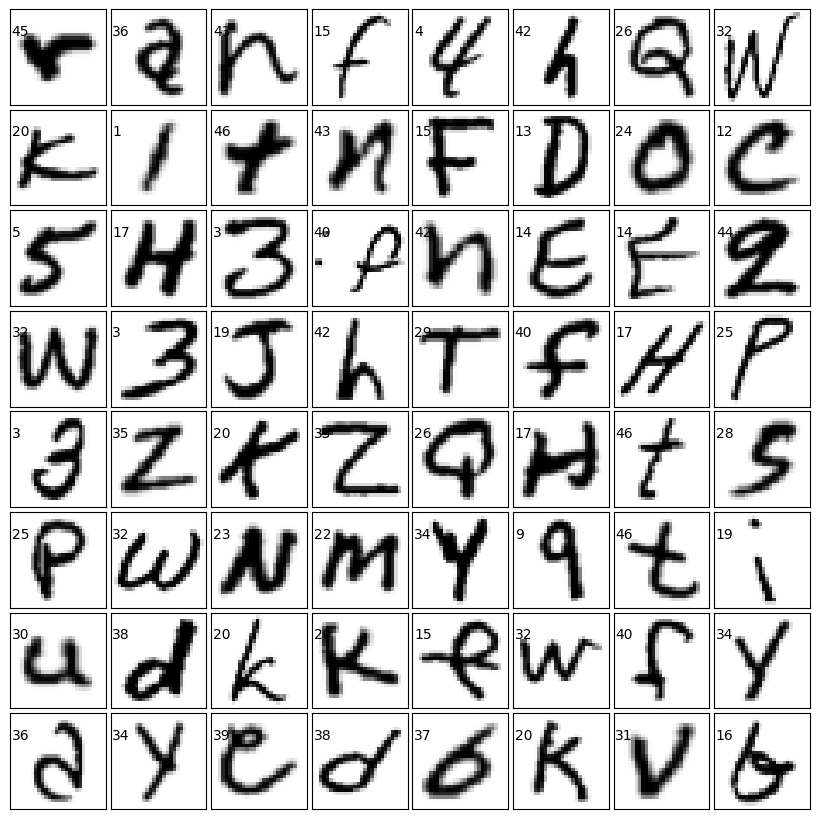

In [ ]:
#
# EDA
# ---------------------------------------

# plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# loop over first 64 samples to visualize
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(y_train[i]))

plt.show()

In [ ]:
# How many pixels per image?
# ----------
num_pixels = x_train.shape[1] * x_train.shape[2]
num_pixels

784

### Train away!

Is do you need to tune any parameters? Is the model expecting data in a different format?

: In the neurla network model, we need to initialize the parameters of model coefficients. For weight, we assumed a normal distribution, and for activation, we applied a relu activation. This function returns 0 for any negative input, but for any positive value, it returns the same value back (y=x).

In [ ]:
# Looks like it's 784. Let's flatten the images into 1D array
# ----------
x_train = x_train.reshape(112800, num_pixels)
x_test = x_test.reshape(18800, num_pixels)

# Convert the data type from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data by dividing the maximum value
x_train /= 255
x_test /= 255

In [ ]:
# set the number of classes
num_classes = 62

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,
                                     num_classes)
y_test = keras.utils.to_categorical(y_test,
                                    num_classes)

In [ ]:
# Let's look at the first label to see how it has been binarized
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# set the number of classes, which we'll need below
num_classes = y_test.shape[1]
num_classes

62

In [ ]:
#
# intialize the sequential model
# ---------------------------------------
model = Sequential()

In [ ]:
# input layer
# -----------

"""
Dense(...) creates a regular densely connected layer.
relu is a rectifier activation function.
"""
model.add(
    Dense(num_pixels,                   # specify the number of neurons
          input_dim=num_pixels,         # specify the input shape
          kernel_initializer='normal',  # specify method for initializing weights - follows Gaussian distribution
          activation='relu')            # specify activation function
)

In [ ]:
# output layer
# -----------

"""
A softmax activation function is used on the output layer to turn the outputs into
probability-like values.
"""
model.add(
    Dense(num_classes,                 # specify the number of output units,
          kernel_initializer='normal', # specify method for initializing weights - follows Gaussian distribution
          activation='softmax')        # specify activation function - softmax turns output to probabilities
)

In [ ]:
# compile the model
# -----------

"""
categorical_crossentropy is a logarithmic loss function and
adam is a gradient descent algorithm
"""
model.compile(loss='categorical_crossentropy',   # specify the loss function
              optimizer='adam',                  # specify optimizer - Adam is an adaptive learning rate optimization algorithm.
              metrics=['accuracy'])              # specify metrics

In [ ]:
#
# fit model
# ---------------------------------------
history=model.fit(x_train,                  # specify the x data
          y_train,                  # specify the y data
          validation_data=(x_test,  # specify the validation data
                           y_test),
          epochs=10,                # number of iterations back and forth through the network
          batch_size=200,           # number of images it will input per batch
          verbose=2);               # print as it goes (similar to folds in cross validation)

Epoch 1/10
564/564 - 1s - loss: 0.2375 - accuracy: 0.9118 - val_loss: 0.5007 - val_accuracy: 0.8440 - 1s/epoch - 3ms/step
Epoch 2/10
564/564 - 1s - loss: 0.2236 - accuracy: 0.9151 - val_loss: 0.5038 - val_accuracy: 0.8462 - 1s/epoch - 2ms/step
Epoch 3/10
564/564 - 1s - loss: 0.2095 - accuracy: 0.9203 - val_loss: 0.5214 - val_accuracy: 0.8447 - 1s/epoch - 2ms/step
Epoch 4/10
564/564 - 1s - loss: 0.1987 - accuracy: 0.9235 - val_loss: 0.5245 - val_accuracy: 0.8459 - 1s/epoch - 2ms/step
Epoch 5/10
564/564 - 1s - loss: 0.1874 - accuracy: 0.9280 - val_loss: 0.5320 - val_accuracy: 0.8472 - 1s/epoch - 2ms/step
Epoch 6/10
564/564 - 1s - loss: 0.1745 - accuracy: 0.9324 - val_loss: 0.5465 - val_accuracy: 0.8459 - 1s/epoch - 2ms/step
Epoch 7/10
564/564 - 1s - loss: 0.1653 - accuracy: 0.9364 - val_loss: 0.5575 - val_accuracy: 0.8466 - 1s/epoch - 2ms/step
Epoch 8/10
564/564 - 1s - loss: 0.1566 - accuracy: 0.9387 - val_loss: 0.5724 - val_accuracy: 0.8423 - 1s/epoch - 2ms/step
Epoch 9/10
564/564 - 1s 

In [ ]:
def plot_accuracy(history):
    """Plot the training and validation accuracy during the training of a model."""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot the training and validation loss during the training of a model
def plot_loss(history):
    """Plot the training and validation loss during the training of a model."""
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Evaluate the model

Evaluate the models on the test set, analyze the confusion matrix to see where the model performs well and where it struggles.

: We could see that in the training model, the accuracy has increased per every epoch, but in the validation set, the accuracy was around 0.84.

In [ ]:
history.history

{'loss': [0.2374761700630188,
  0.22360698878765106,
  0.20948854088783264,
  0.1987486034631729,
  0.1874495893716812,
  0.17451755702495575,
  0.16530190408229828,
  0.15664179623126984,
  0.14908376336097717,
  0.14312726259231567],
 'accuracy': [0.9118351340293884,
  0.9150886535644531,
  0.9202747941017151,
  0.9234840273857117,
  0.9279875755310059,
  0.932384729385376,
  0.9363652467727661,
  0.9387056827545166,
  0.9412056803703308,
  0.9436525106430054],
 'val_loss': [0.5007105469703674,
  0.503815770149231,
  0.5213997960090637,
  0.5245346426963806,
  0.5319955945014954,
  0.5465025305747986,
  0.5574983358383179,
  0.5723769664764404,
  0.5927647352218628,
  0.6062809228897095],
 'val_accuracy': [0.843989372253418,
  0.84617018699646,
  0.8446808457374573,
  0.8459042310714722,
  0.8471808433532715,
  0.8459042310714722,
  0.8465957641601562,
  0.8423404097557068,
  0.8450531959533691,
  0.8405851125717163]}

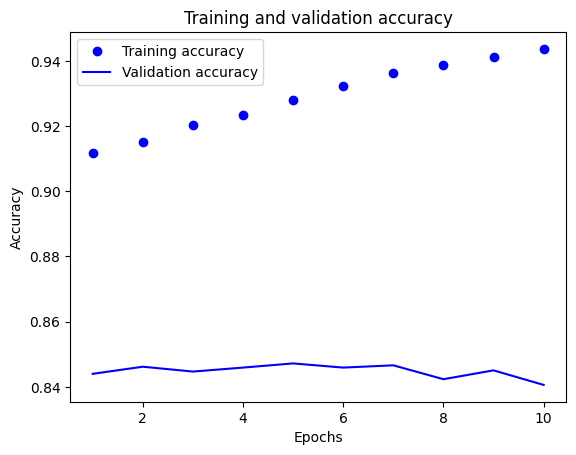

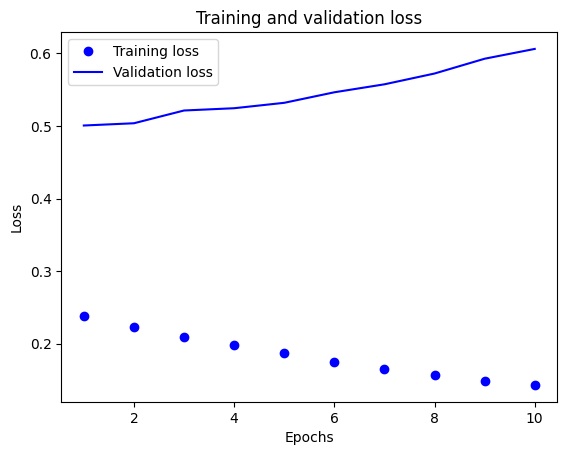

In [ ]:


# Plot the training and validation accuracy during the training of the model
plot_accuracy(history)
plot_loss(history)

### Investigate subsets

On which classes does the model perform well? Poorly? Evaluate again, excluding easily confused symbols (such as 'O' and '0').
: As shown below, we repeated the analysis in the subset of letters and digits.

In the subset of letters, we repeated the model where the outcomes are only letters (a total of 52 outcomes). Then, the model accuracy improved to around 0.91, even in the validation set.

Likewise, in the subset of digits, the model accuracy has improved around 0.99 (after rounding) in the validation set.

In [ ]:
# Working with 'letters'
# Import
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('letters')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('letters')

In [ ]:
# print out some descriptives of the training and testing datasets
print(f'The dataset contains {len(x_train)} training data samples, and {len(x_test)} test data samples')

The dataset contains 124800 training data samples, and 20800 test data samples


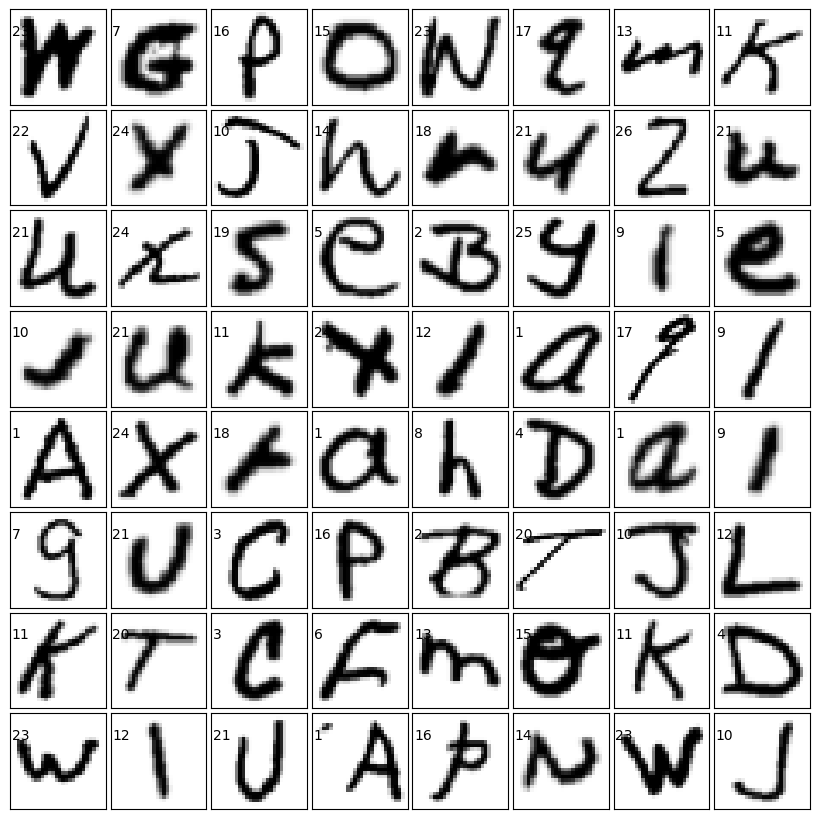

In [ ]:
#
# EDA
# ---------------------------------------

# plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# loop over first 64 samples to visualize
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(y_train[i]))

plt.show()

In [ ]:
 #Let's flatten the images into 1D array
# ----------
x_train = x_train.reshape(124800, num_pixels)
x_test = x_test.reshape(20800, num_pixels)

# Convert the data type from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data by dividing the maximum value
x_train /= 255
x_test /= 255

In [ ]:
# set the number of classes
num_classes = 52

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,
                                     num_classes)
y_test = keras.utils.to_categorical(y_test,
                                    num_classes)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
#
# intialize the sequential model
# ---------------------------------------
model = Sequential()

In [ ]:
# input layer
# -----------

"""
Dense(...) creates a regular densely connected layer.
relu is a rectifier activation function.
"""
model.add(
    Dense(num_pixels,                   # specify the number of neurons
          input_dim=num_pixels,         # specify the input shape
          kernel_initializer='normal',  # specify method for initializing weights - follows Gaussian distribution
          activation='relu')            # specify activation function
)

In [ ]:
# output layer
# -----------

"""
A softmax activation function is used on the output layer to turn the outputs into
probability-like values.
"""
model.add(
    Dense(num_classes,                 # specify the number of output units,
          kernel_initializer='normal', # specify method for initializing weights - follows Gaussian distribution
          activation='softmax')        # specify activation function - softmax turns output to probabilities
)

In [ ]:
# compile the model
# -----------

"""
categorical_crossentropy is a logarithmic loss function and
adam is a gradient descent algorithm
"""
model.compile(loss='categorical_crossentropy',   # specify the loss function
              optimizer='adam',                  # specify optimizer - Adam is an adaptive learning rate optimization algorithm.
              metrics=['accuracy'])              # specify metrics

In [ ]:
#
# fit model
# ---------------------------------------
history=model.fit(x_train,                  # specify the x data
          y_train,                  # specify the y data
          validation_data=(x_test,  # specify the validation data
                           y_test),
          epochs=10,                # number of iterations back and forth through the network
          batch_size=200,           # number of images it will input per batch
          verbose=2);               # print as it goes (similar to folds in cross validation)

Epoch 1/10
624/624 - 2s - loss: 0.7293 - accuracy: 0.7876 - val_loss: 0.4413 - val_accuracy: 0.8692 - 2s/epoch - 4ms/step
Epoch 2/10
624/624 - 1s - loss: 0.3663 - accuracy: 0.8870 - val_loss: 0.3552 - val_accuracy: 0.8899 - 1s/epoch - 2ms/step
Epoch 3/10
624/624 - 1s - loss: 0.2901 - accuracy: 0.9076 - val_loss: 0.3376 - val_accuracy: 0.8938 - 1s/epoch - 2ms/step
Epoch 4/10
624/624 - 1s - loss: 0.2482 - accuracy: 0.9193 - val_loss: 0.3132 - val_accuracy: 0.9034 - 1s/epoch - 2ms/step
Epoch 5/10
624/624 - 1s - loss: 0.2180 - accuracy: 0.9277 - val_loss: 0.2977 - val_accuracy: 0.9053 - 1s/epoch - 2ms/step
Epoch 6/10
624/624 - 1s - loss: 0.1921 - accuracy: 0.9353 - val_loss: 0.3033 - val_accuracy: 0.9037 - 1s/epoch - 2ms/step
Epoch 7/10
624/624 - 1s - loss: 0.1727 - accuracy: 0.9417 - val_loss: 0.2919 - val_accuracy: 0.9099 - 1s/epoch - 2ms/step
Epoch 8/10
624/624 - 1s - loss: 0.1564 - accuracy: 0.9457 - val_loss: 0.2977 - val_accuracy: 0.9107 - 1s/epoch - 2ms/step
Epoch 9/10
624/624 - 1s 

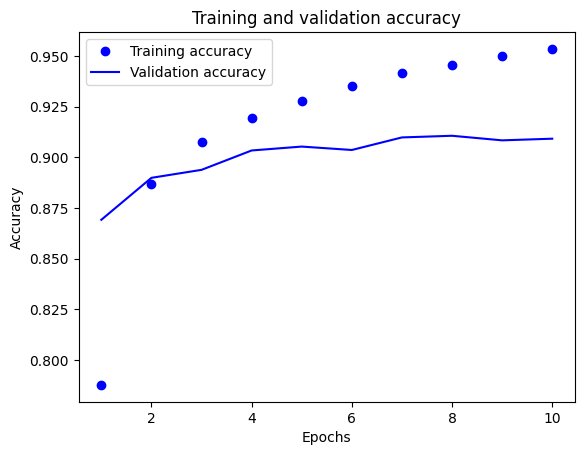

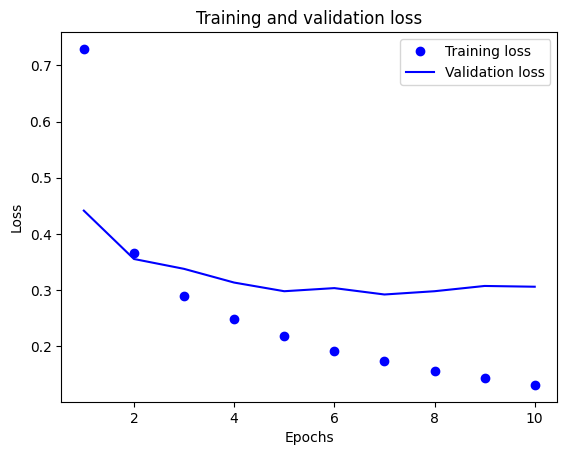

In [ ]:
# Plot the training and validation accuracy during the training of the model
plot_accuracy(history)
plot_loss(history)

In [ ]:
# Working with 'digits'
# Import
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('digits')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('digits')

In [ ]:
# print out some descriptives of the training and testing datasets
print(f'The dataset contains {len(x_train)} training data samples, and {len(x_test)} test data samples')

The dataset contains 240000 training data samples, and 40000 test data samples


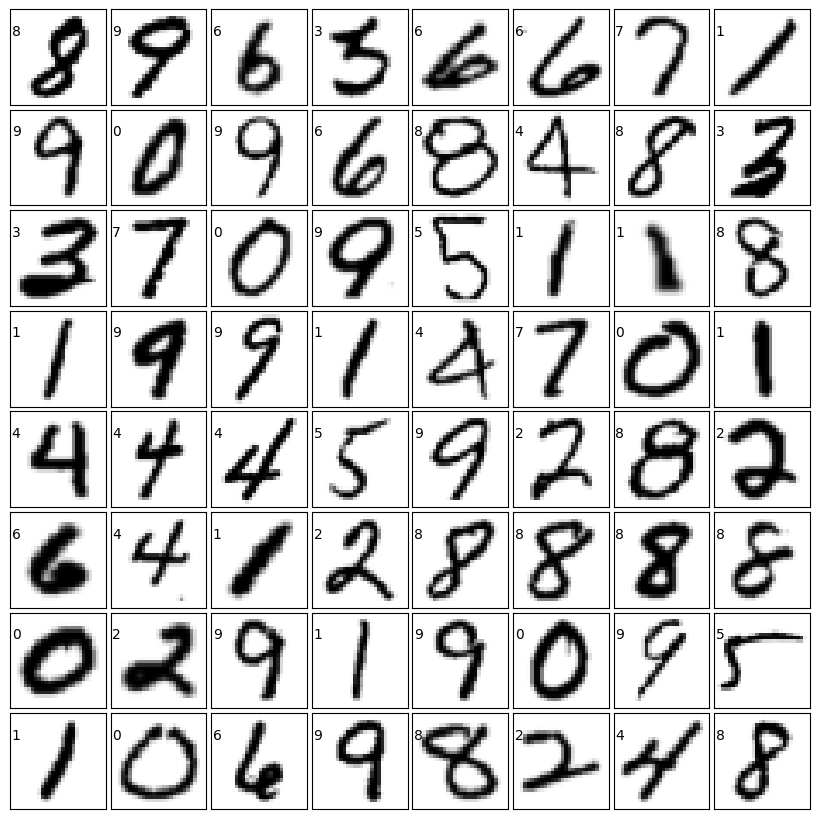

In [ ]:
#
# EDA
# ---------------------------------------

# plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# loop over first 64 samples to visualize
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(y_train[i]))

plt.show()

In [ ]:
 #Let's flatten the images into 1D array
# ----------
x_train = x_train.reshape(240000 , num_pixels)
x_test = x_test.reshape(40000, num_pixels)

# Convert the data type from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data by dividing the maximum value
x_train /= 255
x_test /= 255

In [ ]:
# set the number of classes
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,
                                     num_classes)
y_test = keras.utils.to_categorical(y_test,
                                    num_classes)

In [ ]:
#
# intialize the sequential model
# ---------------------------------------
model = Sequential()

In [ ]:
# input layer
# -----------

"""
Dense(...) creates a regular densely connected layer.
relu is a rectifier activation function.
"""
model.add(
    Dense(num_pixels,                   # specify the number of neurons
          input_dim=num_pixels,         # specify the input shape
          kernel_initializer='normal',  # specify method for initializing weights - follows Gaussian distribution
          activation='relu')            # specify activation function
)

In [ ]:
# output layer
# -----------

"""
A softmax activation function is used on the output layer to turn the outputs into
probability-like values.
"""
model.add(
    Dense(num_classes,                 # specify the number of output units,
          kernel_initializer='normal', # specify method for initializing weights - follows Gaussian distribution
          activation='softmax')        # specify activation function - softmax turns output to probabilities
)

In [ ]:
# compile the model
# -----------

"""
categorical_crossentropy is a logarithmic loss function and
adam is a gradient descent algorithm
"""
model.compile(loss='categorical_crossentropy',   # specify the loss function
              optimizer='adam',                  # specify optimizer - Adam is an adaptive learning rate optimization algorithm.
              metrics=['accuracy'])              # specify metrics

In [ ]:
#
# fit model
# ---------------------------------------
history=model.fit(x_train,                  # specify the x data
          y_train,                  # specify the y data
          validation_data=(x_test,  # specify the validation data
                           y_test),
          epochs=10,                # number of iterations back and forth through the network
          batch_size=200,           # number of images it will input per batch
          verbose=2);               # print as it goes (similar to folds in cross validation)

Epoch 1/10
1200/1200 - 4s - loss: 0.1166 - accuracy: 0.9670 - val_loss: 0.0566 - val_accuracy: 0.9822 - 4s/epoch - 3ms/step
Epoch 2/10
1200/1200 - 3s - loss: 0.0451 - accuracy: 0.9870 - val_loss: 0.0447 - val_accuracy: 0.9864 - 3s/epoch - 2ms/step
Epoch 3/10
1200/1200 - 3s - loss: 0.0332 - accuracy: 0.9904 - val_loss: 0.0374 - val_accuracy: 0.9883 - 3s/epoch - 2ms/step
Epoch 4/10
1200/1200 - 3s - loss: 0.0251 - accuracy: 0.9926 - val_loss: 0.0347 - val_accuracy: 0.9897 - 3s/epoch - 2ms/step
Epoch 5/10
1200/1200 - 3s - loss: 0.0207 - accuracy: 0.9940 - val_loss: 0.0352 - val_accuracy: 0.9898 - 3s/epoch - 2ms/step
Epoch 6/10
1200/1200 - 3s - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0342 - val_accuracy: 0.9902 - 3s/epoch - 2ms/step
Epoch 7/10
1200/1200 - 3s - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.0379 - val_accuracy: 0.9895 - 3s/epoch - 2ms/step
Epoch 8/10
1200/1200 - 3s - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0327 - val_accuracy: 0.9912 - 3s/epoch - 2ms/step
Epoch 9/

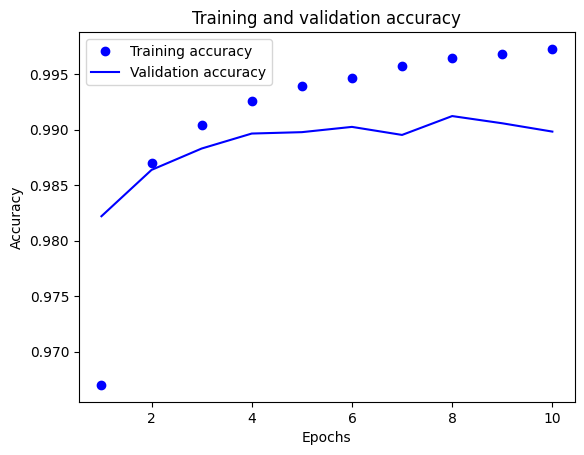

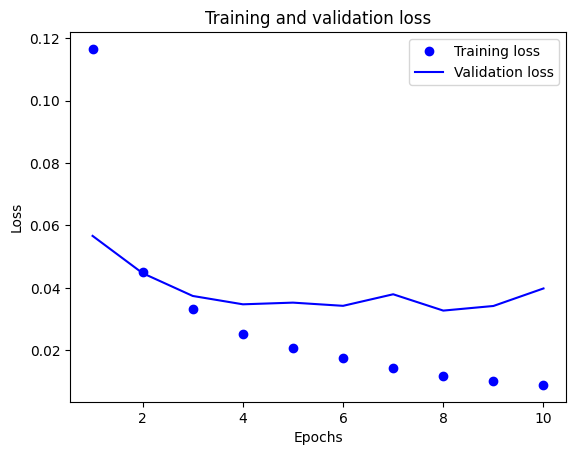

In [ ]:
# Plot the training and validation accuracy during the training of the model
plot_accuracy(history)
plot_loss(history)

## Improve performance
Brainstorm for improving the performance. This could include trying different architectures, adding more layers, changing the loss function, or using data augmentation techniques.

: We can add the layers or change the activation function, epochs, or batch size, For simplicity, we only changed the epochs as shown below.

We increased the epochs from 10 to 15 in the digit-prediction model. In each epoch, the accuracy of the validation set remained between 0.9901 and 0.9909, indicating the increased accuracy compared to the epoch of 10.

In [ ]:
# ways to improve model

#
# fit model
# ---------------------------------------
history=model.fit(x_train,                  # specify the x data
          y_train,                  # specify the y data
          validation_data=(x_test,  # specify the validation data
                           y_test),
          epochs=15,                # number of iterations back and forth through the network
          batch_size=200,           # number of images it will input per batch
          verbose=2);               # print as it goes (similar to folds in cross validation)

Epoch 1/15
1200/1200 - 3s - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0404 - val_accuracy: 0.9901 - 3s/epoch - 2ms/step
Epoch 2/15
1200/1200 - 3s - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.0381 - val_accuracy: 0.9909 - 3s/epoch - 2ms/step
Epoch 3/15
1200/1200 - 3s - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0380 - val_accuracy: 0.9909 - 3s/epoch - 2ms/step
Epoch 4/15
1200/1200 - 3s - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0443 - val_accuracy: 0.9901 - 3s/epoch - 2ms/step
Epoch 5/15
1200/1200 - 3s - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0444 - val_accuracy: 0.9908 - 3s/epoch - 2ms/step
Epoch 6/15
1200/1200 - 3s - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0456 - val_accuracy: 0.9903 - 3s/epoch - 2ms/step
Epoch 7/15
1200/1200 - 3s - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0508 - val_accuracy: 0.9891 - 3s/epoch - 2ms/step
Epoch 8/15
1200/1200 - 3s - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0492 - val_accuracy: 0.9897 - 3s/epoch - 2ms/step
Epoch 9/

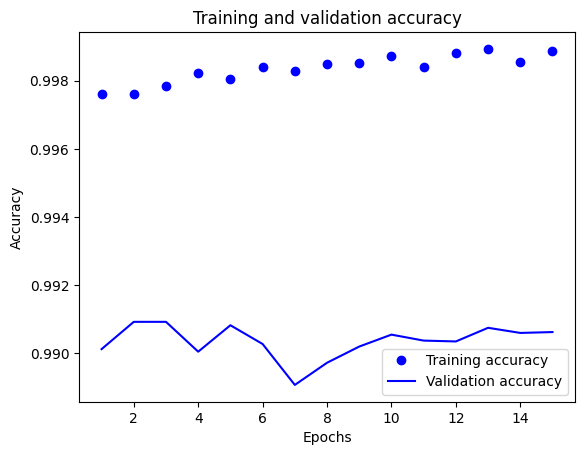

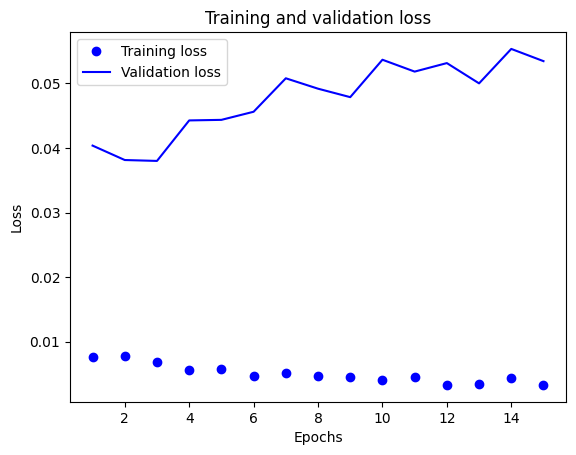

In [ ]:
# Plot the training and validation accuracy during the training of the model
plot_accuracy(history)
plot_loss(history)

Ex. Part 2 - Ridge regression

In [ ]:
# Flatten each image if they are 2D arrays
X_train = np.array([image.flatten() for image in raw_train['image']])

# Ensure the target variable is in the correct shape
y_train = raw_train['label_cat_code'].values  # Assuming 'label_cat_code' is a column in a pandas DataFrame
y_train_allclass = raw_train['mapped_label'].values

# Create validation set (which called test set in the class)
# Assuming 'X_train' has been flattened and 'y_train', 'y_train_allclass' are defined
X_train, X_val, y_train, y_val, y_train_allclass, y_val_allclass = train_test_split(
    X_train, y_train, y_train_allclass, test_size=0.2, random_state=42, stratify=y_train
)

X_head = X_train[:1000]  # Using the first 1000 samples for a smaller training subset
y_head = y_train[:1000]
y_allclass_head = y_train_allclass[:1000]

# Evaluate on test set
X_test = np.array([image.flatten() for image in raw_test['image']])
print(X_test)
y_test_allclass = raw_test['mapped_label']
print(y_test_allclass)

In [ ]:
# Try ridge regression as classifier

# Combine the first 1000 rows of X_train and the first 1000 rows of X_val
X_combined = np.concatenate((X_head, X_val[:429]), axis=0) #429 just to match 70% train and 30% test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_combined_scale = scaler.fit_transform(X_combined.tolist())
X_test_scale = scaler.transform(X_test.tolist())

# If you also want to combine the corresponding labels
y_combined = np.concatenate((y_head, y_val[:429]), axis=0)

# Initialize Ridge Regression
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(random_state = 235)

# Define the parameter grid to search over for Ridge Regression
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Initialize GridSearchCV with 3-fold cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the scaled data
grid_search.fit(X_combined_scale, y_combined)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)

# If you want to use the best model found by GridSearchCV
best_ridge = grid_search.best_estimator_

In [ ]:
# You've already combined and scaled your datasets, so you can directly fit the Ridge model
best_ridge.fit(X_combined_scale, y_combined)

In [ ]:
print(confusion_matrix(y_combined, best_ridge.predict(X_combined_scale)))
print(f'The whole accuracy here is: {accuracy_score(y_combined, best_ridge.predict(X_combined_scale))}')
from sklearn.metrics import f1_score
print(f'The whole F1 score is: {f1_score(y_combined, best_ridge.predict(X_combined_scale))}')

# Perform three-fold cross-validation
cv_scores_ridge = cross_val_score(best_ridge, X_combined_scale, y_combined, cv=3, scoring='f1')
print(f'The scores of each three-fold validation: {cv_scores_ridge}')
print(f'The mean score is: {np.mean(cv_scores_ridge)}')

In [ ]:
# Create a DataFrame to store F1 scores and the mean F1 score for each run
# Assuming you want to store results of multiple runs, consider each run as an iteration
results_df = pd.DataFrame(columns=['Model', 'Fold 1 F1 Score', 'Fold 2 F1 Score', 'Fold 3 F1 Score', 'Mean F1 Score'])

# Add the results of this run to the DataFrame
results_df.loc[len(results_df)] = ['Ridge Classifier', *cv_scores_ridge, np.mean(cv_scores_ridge)]

# Display the DataFrame
print(results_df)

k-nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Instantiate the kNN model for classification
knn_classifier = KNeighborsClassifier()  # Starting with 5 neighbours, adjust based on your needs

# Define the parameter grid to search over for Ridge Regression
param_grid = {
    'n_neighbors': [2, 5, 7, 10] 
}

# Initialize GridSearchCV with 3-fold cross-validation
from sklearn.model_selection import GridSearchCV
grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the scaled data
grid_search_knn.fit(X_combined_scale, y_combined)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search_knn.best_params_)

# If you want to use the best model found by GridSearchCV
best_knn = grid_search_knn.best_estimator_

# Fit the model to your scaled training data
best_knn.fit(X_combined_scale, y_combined)

In [ ]:
print(confusion_matrix(y_combined, best_knn.predict(X_combined_scale)))
print(f'The whole accuracy here is: {accuracy_score(y_combined, best_knn.predict(X_combined_scale))}')
from sklearn.metrics import f1_score
print(f'The whole F1 score is: {f1_score(y_combined, best_knn.predict(X_combined_scale))}')

# Perform three-fold cross-validation
cv_scores_knn = cross_val_score(best_knn, X_combined_scale, y_combined, cv=3, scoring='f1')
print(f'The scores of each three-fold validation: {cv_scores_knn}')
print(f'The mean score is: {np.mean(cv_scores_knn)}')

# Add the results of this run to the DataFrame
results_df.loc[len(results_df)] = ['kNN', *cv_scores_knn, np.mean(cv_scores_knn)]

# Display the DataFrame
print(results_df)

Random Forest

In [ ]:
# Define the parameter distribution
param_dist = {
    'n_estimators': randint(10, 50),  # Example: Number of trees in a range
    'max_depth': [3, 5, 7, 10],  # Example: Maximum depth of the tree
    # Add more parameters and distributions here
}

# Initialize the classifier
rf_classifier_bin = RandomForestClassifier()

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier_bin, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
#If you don't explicitly specify the scoring parameter, it defaults to the estimator's default scorer (if available), which, for most classifiers, is accuracy.
#Reducing number of iterations and CV to make sure run time is not long

# Fit the random search to the data
random_search.fit(X_combined_scale, y_combined)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Use the best estimator for further predictions
best_rf_bin_classifier = random_search.best_estimator_

In [ ]:
print(confusion_matrix(y_combined, best_rf_bin_classifier.predict(X_combined_scale)))
print(f'The whole accuracy here is: {accuracy_score(y_combined, best_rf_bin_classifier.predict(X_combined_scale))}')
print(f'The whole F1 score is: {f1_score(y_combined, best_rf_bin_classifier.predict(X_combined_scale))}')

# Perform three-fold cross-validation
cv_scores_rf = cross_val_score(best_rf_bin_classifier, X_combined_scale, y_combined, cv=3, scoring='f1')
print(f'The scores of each three-fold validation: {cv_scores_rf}')
print(f'The mean score is: {np.mean(cv_scores_rf)}')

# Add the results of this run to the DataFrame
results_df.loc[len(results_df)] = ['RF', *cv_scores_rf, np.mean(cv_scores_rf)]

# Display the DataFrame
print(results_df)

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate the gradient boosting model for classification
gb_classifier = GradientBoostingClassifier()  # Starting with 5 neighbours, adjust based on your needs

# Define the parameter grid to search over for Ridge Regression
param_grid = {
    'n_estimators': [2, 5, 7, 10],
    'learning_rate': [0.1, 0.01, 0.001]
}
gb_classifier_gs = GridSearchCV(gb_classifier, param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the scaled data
gb_classifier_gs.fit(X_combined_scale, y_combined)

# Print the best parameters and the corresponding score
print("Best parameters:", gb_classifier_gs.best_params_)

# If you want to use the best model found by GridSearchCV
best_gb = gb_classifier_gs.best_estimator_

# Fit the model to your scaled training data
best_gb.fit(X_combined_scale, y_combined)

In [ ]:
print(confusion_matrix(y_combined, best_gb.predict(X_combined_scale)))
print(f'The whole accuracy here is: {accuracy_score(y_combined, best_gb.predict(X_combined_scale))}')
print(f'The whole F1 score is: {f1_score(y_combined, best_gb.predict(X_combined_scale))}')

# Perform three-fold cross-validation
cv_scores_gb = cross_val_score(best_gb, X_combined_scale, y_combined, cv=3, scoring='f1')
print(f'The scores of each three-fold validation: {cv_scores_gb}')
print(f'The mean score is: {np.mean(cv_scores_gb)}')

# Add the results of this run to the DataFrame
results_df.loc[len(results_df)] = ['GB', *cv_scores_gb, np.mean(cv_scores_gb)]

# Display the DataFrame
print(results_df)

Each model performance

In [ ]:
# Find the index of the row with the highest mean F1 score
max_f1_index = results_df['Mean F1 Score'].idxmax()

# Print the row with the highest mean F1 score
print(results_df.loc[max_f1_index])

In [ ]:
# Apply it to the validation data
y_test = raw_test['label_cat_code']

print(confusion_matrix(y_test, best_knn.predict(X_test_scale)))
print(f'The whole accuracy here is: {accuracy_score(y_test, best_knn.predict(X_test_scale))}')
from sklearn.metrics import f1_score
print(f'The whole F1 score is: {f1_score(y_test, best_knn.predict(X_test_scale))}')